In [4]:
%load_ext autoreload
%autoreload 2

This still needs commenting!

In [5]:
from matplotlib import pyplot as plt
import koala.phase_space as ps
from koala.example_graphs import *
import koala.plotting as pl
from koala.graph_color import color_lattice
from matplotlib import cm
from koala.flux_finder import fluxes_from_bonds,fluxes_to_labels
from numpy import linalg as la
# %matplotlib widget

<AxesSubplot:>

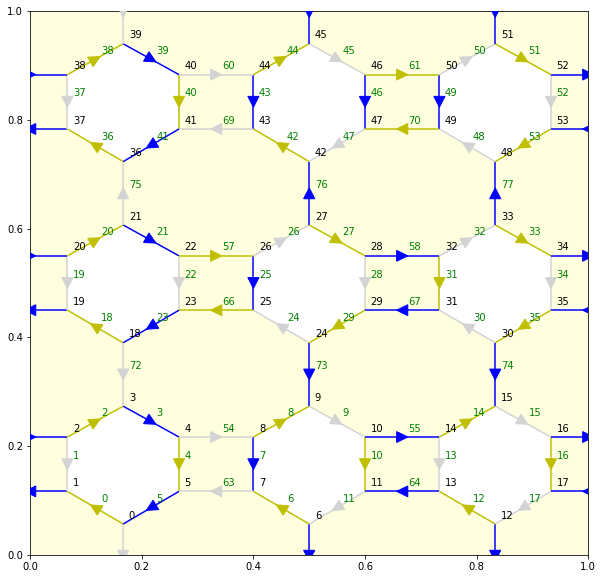

In [49]:
# lattice generation
size = 3
lattice  = generate_hex_square_oct(size)
coloring = color_lattice(lattice)
j_vals = np.array([1,1,1])
ujk = np.ones(lattice.n_edges)

flip_selection = slice(1,6*size*size,6) # hex
ujk[flip_selection] = -1

# flip_selection = slice(0,6*size*size,6) # all
# ujk[flip_selection] = -1

# flip_selection = slice(1,6*size*size,6) # oct
# ujk[flip_selection] = -1
# flip_selection = slice(2,6*size*size,6) 
# ujk[flip_selection] = -1



# flip_selection = [75,76,77]
# ujk[flip_selection] = -ujk[flip_selection]

# plotting
fluxes = fluxes_from_bonds(lattice,ujk)
c_scheme = pl.peru_friendly_colour_scheme(3)
fig, ax = plt.subplots(figsize=(10,10))
pl.plot_edges(lattice, directions = ujk, labels = coloring, color_scheme = c_scheme)
pl.plot_vertex_indices(lattice)
pl.plot_edge_indices(lattice)
pl.plot_plaquettes(lattice,fluxes_to_labels(fluxes),color_scheme=['white','lightyellow'])


In [50]:
steps = 50
kx = np.linspace(0,np.pi*2,steps, endpoint= False)
ky = np.linspace(0,np.pi*2,steps, endpoint= False)

H = ps.k_hamiltonian_generator(lattice,coloring,j_vals,ujk)

KX, KY = np.meshgrid(kx, ky)

k_vals = np.concatenate([KX[:,:,np.newaxis],KY[:,:,np.newaxis]],axis=2)

def find_energy(k):
    h = H(k)
    vals = la.eigvalsh(h)
    return vals

def find_gap(k):
    h = H(k)
    vals = la.eigvalsh(h)
    return np.min(np.abs(vals))

bands = np.apply_along_axis(find_energy,2,k_vals)

gaps = np.apply_along_axis(find_gap,2,k_vals)

n_states = steps*steps*len(bands[1,1,::2])

ground_state_energy = np.sum(bands*(bands<0))
print(format(ground_state_energy/(n_states), '.6f') )

-0.795633


Hexagon/square/octagon:\
all:    -0.742 \
hex:    -0.796 \
oct:    -0.766\
squ:    -0.738

Triangle/nonagon:\
tri:    -0.7627\
non:    -0.7627

all:    -0.7527\
none:   -0.7527




2.698154455921805e-16


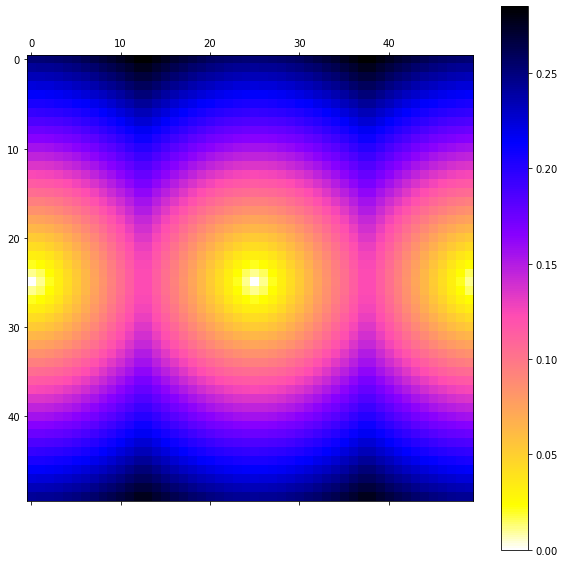

In [51]:
fig, ax = plt.subplots(figsize = (10,10))
cax = ax.matshow(gaps, cmap = 'gnuplot2_r',vmin = 0)
fig.colorbar(cax)
print(np.min(gaps))

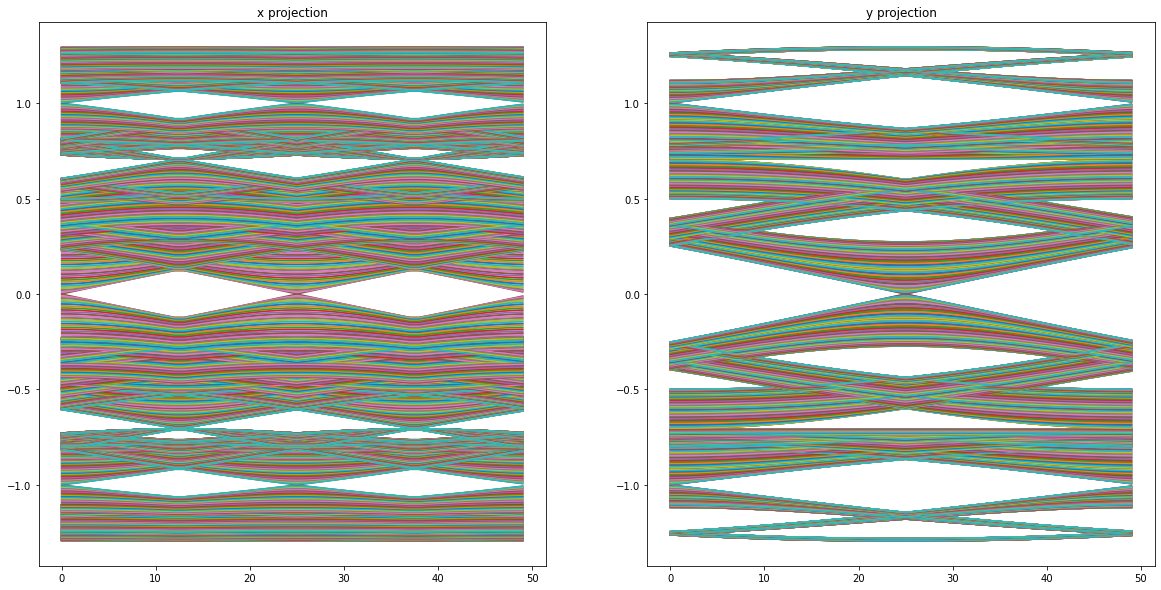

In [52]:



fig, ax = plt.subplots(1,2,figsize = (20,10))
for n in range(bands.shape[2]):

    ax[0].set_title('x projection')
    ax[1].set_title('y projection')
    
    ax[0].plot(bands[:,:,n].T)    
    ax[1].plot(bands[:,:,n])
    
    # ax[0].set_ylim(-0.3,0.3)
    # ax[1].set_ylim(-0.3,0.3)

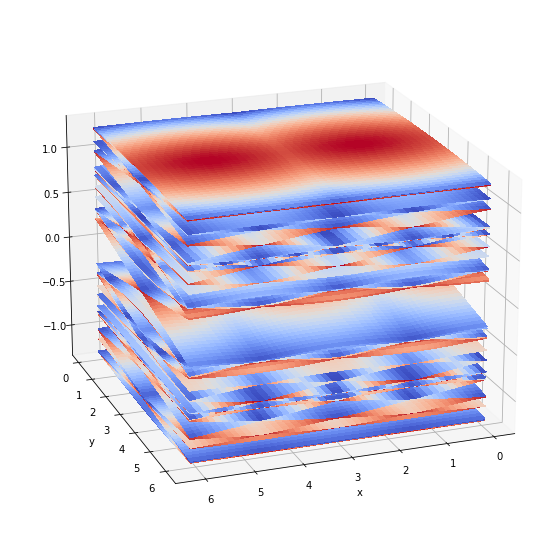

In [53]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize = (10,10))
for n in range(bands.shape[2]):
    Z = bands[:,:,n]
    surf = ax.plot_surface(KX, KY, Z, cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.view_init(20, 70)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()


-10.935569545863773